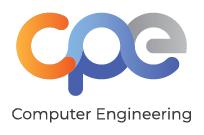

# CPE112: Programming with Data Structures
# Assignment3 Linked List

<div style="color: yellow;">สิ่งที่ได้จากการเรียนในคาบ</div>

* Linked List คือ Data Structure แบบ Linear Data Structure ที่มีลักษณะพิเศษ <br> คือมีการเก็บข้อมูลลงใน Node ที่ประกอบไปด้วย ข้อมูล และ Pointer ที่ชี้ element ถัดไป และที่สำคัญคือมันไม่จำกัดขนาดของข้อมูล

* Linked List เป็น Data Structure ที่สร้างขึ้นมาเพื่อลบข้อด้อยของ Dynamic Array หรือ List ของ Python ซึ่งได้แก่ <br> 
1. ประหยัดเนื้อที่กว่า Dynamic Array ที่จองเอง
2. การ Insertion และ Deletion จะไม่ทำให้ใช้พื้นที่เยอะ

* Singly Linked list คือ Linked List ที่มี Pointer ตัวชี้เพียงตัวเดียวคือ next ซึ่งชี้ไปด้านหน้าทางเดียว <br> ประกอบไปด้วยโหนดหัวและโหนดหางที่สำคัญ <br>

* Circular Linked List คือ Singly Linked List ที่มีการเชื่อมระหว่างหัวกับหาง โดยที่หางจะชี้ไปที่หัวเสมอ <br> ตัวอย่างการใช้งาน เช่น การทำ Round-Robin Schedulers ในวิชา Computer Architecture หรือ OS <br>

* Doubly Linked list คือ Linked List ที่มี Pointer ตัวชี้สองทางทั้ง ชี้ตัวก่อนหน้า และชี้ไปด้านหน้า <br>

* Multi-Linked List คือ Linked list ที่ไม่จำกัด Pointer ที่อ้างอิงถึงข้อมูล มีได้หลาย Pointer <br>

* เทคนิค Header and Trailer Sentinels คือการสร้างโหนดหัวและหางที่เป็น Dummy Nodes หรือไม่มีข้อมูลอยู่ในนั้น แต่จะตั้งอยู่ที่หัวและหางเสมอ <br> เป็นเทคนิคที่เขียนเพื่อให้สะดวกในการสร้าง Method Insertion และ Deletion เนื่องจากโดยปกติแล้ว การที่เราจะเขียน <br> Method ของ ADT นั้นเราจะต้องกำหนดหัวและหางเป็นโหนดใหม่อยู่เรื่อยๆ แต่ถ้าหากใช้เทคนิค Header and Trailer Sentinels <br> เราจะเขียน Method ได้ง่ายขึ้น เช่นการ Insertion และ Deletion จะทำเป็นการ Insert และ Delete ระหว่างโหนดเสมอ



### Implementation of the Singly linked lists.
**Singly Linked-List ADT** <br>
Singly Linked List is linked list that are a collection of Nodes. By each nodes contain the data part and the pointer part. The nodes can be accessed in a sequential way, a single link to next node with the next pointer to create a sequential data structure.

| properties/methods    | description    |
| --- | --- | 
| Single_Linked_list() | create a new single linked list without any node |
| prepend(item) | add a new node to the head of linked list |
| append(item) | add a new node to the tail of linked list |
| traverse() | print all contained data in linked list |
| search(target) | return True if target item was found in linked list, return False if target item was not in linked list | 
| remove(target | remove the first found target from linked list |
| isEmpty() | return True if the linked list has no node and return False if not
| length() | return the number of node contained in Linked list


In [44]:
class _SLinkNode:
    def __init__(self,item):
        self._item = item
        self._next = None
#-------------------------------
class SLinkedlist:
    def __init__(self):
        self._head = None
        self._tail = None
        self._size = 0

    def __len__(self):
        return self._size

    def prepend(self,item):
        newNode = _SLinkNode(item) #1
        if self.isEmpty():
            self._tail = newNode
        else:
            newNode._next = self._head #2
        self._head = newNode #3
        self._size += 1

    def append(self,item):
        newNode = _SLinkNode(item)
        if self.isEmpty():
            self._head = newNode
        else:
            self._tail._next = newNode
        self._tail = newNode
        self._size += 1

    def __contains__(self, target):
        curNode = self._head
        while curNode is not None and curNode._item != target:
            curNode = curNode._next
        return curNode is not None
    
    def isEmpty(self):
        return len(self) == 0

    def remove(self,item):
        predNode = None
        curNode = self._head
        while curNode is not None and curNode._item != item:
            predNode = curNode
            curNode = curNode._next
            #print("Now predNode is {0} and curNode is {1}".format(predNode._item,curNode._item))
        assert curNode is not None, "The item must be in this linked list"
        self._size -= 1

        if curNode is self._head:
            self._head = curNode._next
        # do not remember if curNode = self._tail
        # shift tail to predNode
        elif curNode is self._tail:
            self._tail = predNode
            self._tail._next = None
        else:
            predNode._next = curNode._next
        return curNode._item

    def __iter__(self):
        self._curNode = self._head
        return self

    def __next__(self):
        if self._curNode is None:
            raise StopIteration
        else:
            item = self._curNode._item
            self._curNode = self._curNode._next
            return item
    
    def __repr__(self):
        curNode = self._head
        s = "["
        while curNode is not None:
            s = s + str(curNode._item)+ "->"
            curNode = curNode._next
        s = s[:-2] + "]"
        return s

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice1 </span>: Implement Stack with Linked list
### ------------------------------------------------------------------------------------
Make a new class named **LStack** by using Singly linked list in the implementation

### Implementation of the Stack ADT using linked lists.

**Stack ADT**  
A stack is a data structure that stores a linear collection of items with access limited to a last-in first-out (LIFO) order. Adding and removing items is restricted to one end known as the top of the stack. An empty stack is one containing no items.
| properties/methods    | description    |
| --- | --- |
| __Stack()__: | Creates a new empty stack.|
| __isEmpty()__: | Returns a Boolean value indicating if the stack is empty.|
| __length()__: | Returns the number of items in the stack.|
| __pop()__: | Removes and returns the top item of the stack, if the stack is not empty. Items cannot be popped from an empty stack. The next item on the stack becomes the new top item.|
| __peek()__: | Returns a reference to the item on top of a non-empty stack without removing it. Peeking, which cannot be done on an empty stack, does not modify the stack contents.|
| __push(item)__: | Adds the given item to the top of the stack.|
| __\_\_repr\_\_()__ : | represent the item contained in stack |

* ขออนุญาตเขียนโดยไม่ Inheritance class SLinkedList เพราะอยาก Implement ให้มีแค่ส่วน head และอยากลองเขียนเองดูครับ

In [3]:
# implement LStack class here
class Stack(_SLinkNode):
    def __init__(self):
        self._head = None
        self._size = 0

    def isEmpty(self):
        return len(self) == 0
    
    def __len__(self):
        return self._size

    def push(self,item):
        newNode = _SLinkNode(item)
        if self.isEmpty():
            self._head = newNode
        else:
            newNode._next = self._head # เชื่อมต่อ next ของตัวที่ ไปที่ตัวล่าสุด
            self._head = newNode
        self._size += 1

    def pop(self):
        assert not self.isEmpty() , "Cannot pop the empty stack."
        temp = self._head
        self._head = self._head._next
        temp._next = None
        self._size -= 1
        return temp._item
        
    
    def peek(self):
        assert not self.isEmpty() , "Cannot peek the empty stack."
        return self._head._item
    
    def __repr__(self):
        assert not self.isEmpty() , "There's no member to show in stack."
        curNode = self._head
        s = ""
        while curNode is not None:
            s = s + "| \t" + str(curNode._item) + "\t|\n"
            curNode = curNode._next
        s = s + "-----------------"
        return s
        

In [4]:
MyStack = Stack()

In [5]:
MyStack.push(15)
MyStack.push(20)
MyStack.push(45)
len(MyStack)

3

In [6]:
MyStack

| 	45	|
| 	20	|
| 	15	|
-----------------

In [7]:
MyStack.pop()

45

In [8]:
MyStack.peek()

20

In [9]:
MyStack.isEmpty()

False

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice2 </span>: Implement Queue with Singly Linked list
### ------------------------------------------------------------------------------------
Make a new class named **LQueue** by using Singly linked list in the implementation

### Implementation of the Queue ADT using linked lists

**QUEUE ADT**  
A queue is a data structure that a linear collection of items in which access is restricted to a first-in first-out (FIFO) basis. New items are inserted at the back and existing items are removed from the front. The items are maintained in the order in which they are added to the structure.
| properties/methods    | description    |
| --- | --- |
| __Queue()__: | Creates a new empty queue, which is a queue containing no items. |
| __isEmpty()__: | Returns a Boolean value indicating whether the queue is empty. |
| __length()__: | Returns the number of items currently in the queue. |
| __enqueue(item)__: | Adds the given item to the back of the queue. |
| __dequeue()__: | Removes and returns the front item from the queue. An item cannot be dequeued from an empty queue. |
| __\_\_repr\_\_()__ : | represent the item contained in queue |

In [10]:
# implement LQueue class here
class LQueue(SLinkedlist,_SLinkNode): # Note ว่า เราจะต้อง Inheritance SLinkedlist ก่อน _SLinkNode เพราะ มันจะเรียกใช้ __init__ จาก left to right
    def enqueue(self,item):
        super().append(item)
    def dequeue(self):
        head_item = self._head._item
        super().remove(head_item)
        return head_item
    def __repr__(self):
        curNode = self._head
        s = "["
        while curNode is not None:
            s = s + str(curNode._item)+ "<-"
            curNode = curNode._next
        s = s[:-2] + "]"
        return s

In [11]:
MyQueue = LQueue()

In [12]:
MyQueue.isEmpty()

True

In [13]:
MyQueue.enqueue(25)
MyQueue.enqueue(17)
MyQueue.enqueue(147)
MyQueue.enqueue(125)

In [14]:
MyQueue

[25<-17<-147<-125]

In [15]:
MyQueue.dequeue()

25

In [16]:
MyQueue

[17<-147<-125]

In [17]:
len(MyQueue)

3

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice3 </span>: Implement Deque with Double Linked list
### ------------------------------------------------------------------------------------
Make a new queue class named **DDque** by using Double linked list in the implementation

### Implementation of the Deque ADT using Double linked list

**Double-Ended Queue ADT**  
A doubled-ended queue is a queue-like data structure that supports insertion and deletion at both the front and the back of the queue.
| properties/methods    | description    |
| --- | --- |
| __Deque()__: | Create a new empty deque, which no item with in.|
| __AddFirst(item)__: | Add an item to the front of deque.|
| __AddRear(item)__: | Add an item to the back of deque.|
| __DeleteFirst()__: | Remove and return the first item from deque; an error occurs if the deque is empty.|
| __DeleteRear()__: | Remove and return the last item from deque; an error occurs if the deque is empty.|
| __First()__: | Return (but do not remove) the first item of deque; an error occurs if the deque is empty.|
| __Rear()__: | Return (but do not remove) the last item of deque; an error occurs if the deque is empty.|
| __isEmpty()__: | Return True if deque does not contain any items.|
| __length()__: | Return the number of items in deque.|
| __\_\_repr\_\_()__ : | represent the item contained in stack |


In [18]:
class _DLinkNode(object):
    def __init__(self,item,prev,next):
        self._item = item
        self._prev = prev
        self._next = next

class DLinkedList:
    # Construct an empty Deque.
    def __init__(self):
        self._header = _DLinkNode(None,None,None)
        self._trailer = _DLinkNode(None,None,None)
        self._header._next = self._trailer
        self._trailer._prev = self._header
        self._size = 0
    
    def insert_between(self,item,predecessor,successor):
        newNode = _DLinkNode(item,predecessor,successor)
        predecessor._next = newNode
        successor._prev = newNode
        self._size += 1
    
    def delete_node(self,node):
        predecessor = node._prev
        successor = node._next
        predecessor._next = successor
        successor._prev = predecessor
        self._size -= 1
        item = node._item
        node._prev = node._next = node._item = None
        return item

In [32]:
# implement DDeque class here
class DDeque(DLinkedList , _DLinkNode): # เราต้อง inherit Double linked list มาก่อน แล้วจึง Node เพราะมันจะเอา __init__ จากซ้ายไปขวา
    def isEmpty(self):
        return len(self) == 0
    
    def __len__(self):
        return self._size
    
    def AddFirst(self,item):
        self.insert_between(item,self._header,self._header._next)

    def AddRear(self,item):
        self.insert_between(item,self._trailer._prev , self._trailer)

    def First(self):
        assert not self.isEmpty() , "The Deque is empty."
        return self._header._next._item

    def Rear(self): 
        assert not self.isEmpty() , "The Deque is empty."
        return self._trailer._prev._item
    
    def DeleteFirst(self):
        assert not self.isEmpty() , "Cannot remove object. The deque is empty."
        return self.delete_node(self._header._next)

    def DeleteRear(self):
        assert not self.isEmpty() , "Cannot remove object. The deque is empty."
        return self.delete_node(self._trailer._prev)

    def __repr__(self):
        curNode = self._header._next
        s = "["
        while curNode is not self._trailer :
            s = s + str(curNode._item)+ "<->"
            curNode = curNode._next
        s = s[:-2] + "]"
        return s

In [33]:
MyDQ = DDeque()

In [34]:
MyDQ.AddFirst(15)
MyDQ.AddFirst(25)
MyDQ.AddRear(39)

In [35]:
MyDQ

[25<->15<->39<]

In [36]:
MyDQ.isEmpty()

False

In [37]:
MyDQ.First()

25

In [38]:
MyDQ.Rear()

39

In [39]:
MyDQ.AddFirst(47)
MyDQ.AddRear(89)
MyDQ

[47<->25<->15<->39<->89<]

In [40]:
MyDQ.DeleteFirst()

47

In [41]:
MyDQ.DeleteRear()

89

In [42]:
MyDQ

[25<->15<->39<]

In [43]:
len(MyDQ)

3

In [31]:
# Test for the error in assert function
NewDQ = DDeque()
NewDQ.First()

AssertionError: The Deque is empty.

---

## Question:
1. What is diffenent between Singly Linked List and Double Linked List?

<span style="color: red; text-decoration: underline;">Ans</span> Singly Linked List เป็นโครงสร้างแบบ Linked List ที่แต่ละ Node มี Pointer ที่ชี้ไปตัวถัดไป (next) แค่ทางเดียว ในขณะที่ Doubly Linked List แต่ละ Node มี Pointer 2 ทาง คือชี้ไปตัวก่อนหน้า (previous) กับ ชี้ไปด้านหน้า (next)

2. Which case we need Double Linked List?

<span style="text-decoration: underline; color:red;">Ans</span> ในกรณีที่เราจะต้อง Implement Deque เนื่องจากเป็น Data Structure ที่สามารถเลือกได้ว่าจะ Enqueue หรือ Dequeue <br> ทำให้ข้อมูลนั้น
ต้องมี Pointer (ที่เราเรียกกันในภาษา C) สองทางเพื่อให้สะดวกต่อการอ้างอิงข้อมูล

3. What is the benefit of sentinel (dummy) nodes in Double Linked List

<span style="text-decoration: underline; color:red;">Ans</span> เนื่องจากในการ Implement ด้วย Double Linked List 
บางครั้งเราจะต้องกำหนด head และ tail ใหม่เสมอ <br> เมื่อทำการเปลี่ยนแปลงค่าส่วนหัวและหาง ทำให้การเขียนโปรแกรมจะยุ่งยากกว่าการที่เรามี Dummy Nodes <br> และการเขียน Dummy Nodes ขึ้นมาจะลดเวลาที่เราใช้เขียน Method เราจะไม่ต้องเขียนให้ยุ่งยาก <br>แค่ใช้หลักการของ การเพิ่ม Node ใหม่ ระหว่าง 2 Node หรือการลบ Node โดยการเชื่อม Node ก่อนหน้าและด้านหน้า ได้เหมือนกันเกือบทุก Method

---

<div style="color: green;">นายศวิษฐ์ โกสียอัมพร 65070506026 </div>
<div style="color: pink;">นางสาวปุญชญา จันทร์เจริญ 65070506039 </div>